# Imports

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
TYPE_METIER = {
    1: 'Ouv',
    2: 'Salr',
    3: 'Cad. S'
}

# Data

In [8]:
data = [
    [1, 7, 495, 776, 423, 759, 1848, 655, 486],
    [2, 7, 518, 995, 548, 893, 2056, 584, 319],
    [3, 7, 561, 1097, 887, 1167, 2630, 515, 284],
    [1, 6, 414, 660, 367, 638, 1620, 534, 407],
    [2, 6, 400, 699, 484, 762, 1856, 460, 416],
    [3, 6, 304, 789, 621, 1149, 2366, 385, 282],
    [1, 5, 324, 563, 341, 544, 1507, 406, 407],
    [2, 5, 319, 608, 396, 568, 1501, 386, 363],
    [3, 5, 243, 843, 689, 1148, 2345, 438, 341],
    [1, 4, 247, 428, 354, 526, 1437, 332, 427],
    [2, 4, 239, 559, 388, 567, 1527, 293, 258],
    [3, 4, 235, 767, 562, 927, 1948, 372, 433],
]
columns = [
    'Type_métier', 
    'Taille_famille', 
    'Produits_laitiers',
    'Pommes_de_terre',
    'Fruits', 
    'Viande_blanche', 
    'Viande', 
    'Pain', 
    'Légumes_secs'
]

df = pd.DataFrame(data=data, columns=columns)
df.head()

,Type_métier,Taille_famille,Produits_laitiers,Pommes_de_terre,Fruits,Viande_blanche,Viande,Pain,Légumes_secs
0,1,7,495,776,423,759,1848,655,486
1,2,7,518,995,548,893,2056,584,319
2,3,7,561,1097,887,1167,2630,515,284
3,1,6,414,660,367,638,1620,534,407
4,2,6,400,699,484,762,1856,460,416


<Axes: >

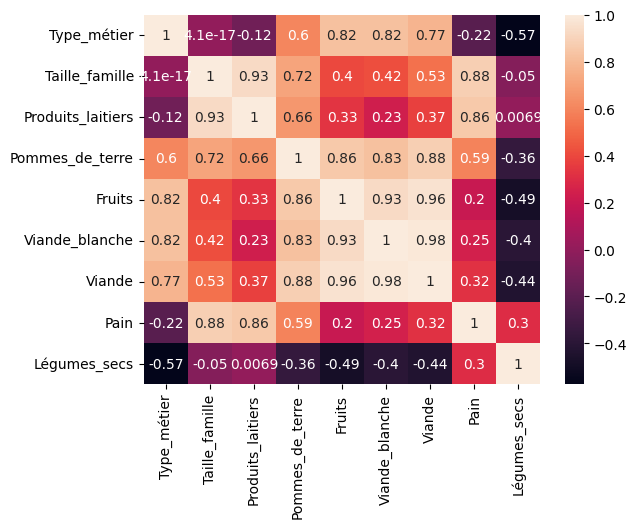

In [9]:
# 1
corr = df.corr()
sns.heatmap(corr,annot=True)

In [10]:
# 2
eigenvalues, _ = np.linalg.eig(corr)

mat = pd.DataFrame({
    "Valeurs propres": np.sort(eigenvalues)[::-1],
    "Taux d’inertie": np.sort(eigenvalues)[::-1]/len(columns),
    "Taux cumulés": np.cumsum(np.sort(eigenvalues)[::-1]/len(columns))
})
mat

,Valeurs propres,Taux d’inertie,Taux cumulés
0,5.266077,0.585120,0.585120
1,2.693513,0.299279,0.884399
2,0.690286,0.076698,0.961097
3,0.150471,0.016719,0.977816
4,0.112149,0.012461,0.990277
5,0.070789,0.007865,0.998143
6,0.013164,0.001463,0.999605
7,0.002664,0.000296,0.999901
8,0.000887,0.000099,1.000000


In [11]:
# 3
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

pca_2 = PCA(n_components=2)
pca_2.fit(scaled_data)
principal_components_2 = pca_2.transform(scaled_data)

pc_table = pd.DataFrame(data=principal_components_2)
print(pc_table)

           0         1
0   0.245701  3.370946
1   2.253224  1.571683
2   4.856560 -0.009572
3  -1.113350  1.875368
4  -0.106573  0.699773
5   2.015700 -1.790264
6  -2.432471  0.606950
7  -1.723014 -0.295602
8   1.830321 -1.904179
9  -3.478165 -0.373601
10 -2.190237 -1.972565
11 -0.157695 -1.778936


TypeError: vlines() missing 2 required positional arguments: 'ymin' and 'ymax'

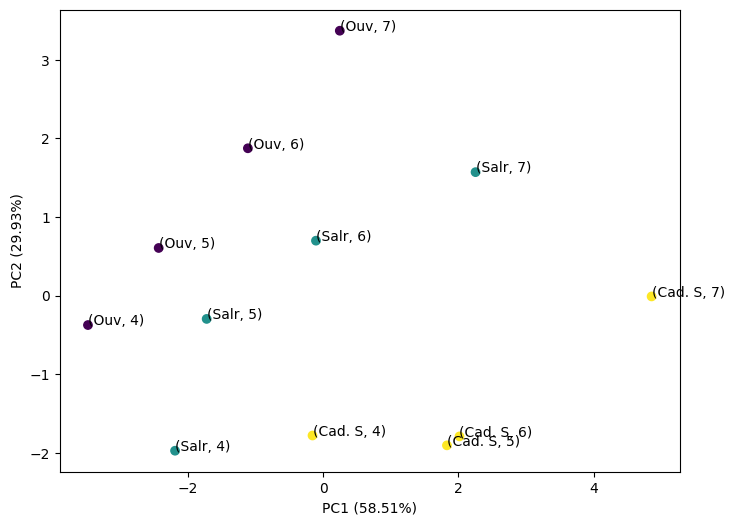

In [24]:
# 4
explained_variance_ratio = pca_2.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.scatter(principal_components_2[:,0],principal_components_2[:,1],c=df["Type_métier"])
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%})')
for i, type_metier in enumerate(df['Type_métier']):
    plt.annotate(f"({TYPE_METIER[type_metier]}, {df['Taille_famille'][i]})",
                 (principal_components_2[:,0][i],principal_components_2[:,1][i]))
plt.show()


In [13]:
# 5
pca = PCA()
pca.fit(scaled_data)

# get the coordinates of the variables on all principal components
variable_coordinates = pca.components_.T

# create a table with the coordinates of the variables on all principal components
variable_coordinates_table = pd.DataFrame(data=variable_coordinates, columns=[f'PC{i+1}' for i in range(variable_coordinates.shape[1])])
variable_coordinates_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.296979,-0.415393,0.140532,-0.245737,-0.456075,0.577350,0.281851,-0.180143,0.076727
1,0.301943,0.408888,-0.192731,0.362715,0.106583,0.559633,0.055299,0.490378,-0.069689
2,0.255403,0.454479,-0.283754,-0.477345,0.247503,0.178259,-0.167191,-0.542557,-0.066990
3,0.422273,0.070596,-0.001115,-0.326903,-0.441818,-0.281583,-0.518071,0.405460,0.050476
4,0.402225,-0.181160,0.107157,-0.356533,0.469368,-0.252323,0.482065,0.307140,-0.236861
5,0.396947,-0.177262,0.281907,0.435202,0.053913,-0.045736,-0.302094,-0.316714,-0.587854
6,0.418372,-0.120180,0.156716,0.258602,0.316178,-0.072896,-0.113620,-0.151770,0.760171
7,0.216622,0.509536,0.139321,0.206877,-0.432842,-0.357394,0.520898,-0.206975,0.044529
8,-0.189146,0.332284,0.853032,-0.217112,0.116796,0.208829,-0.115154,0.088295,0.026494


<Axes: >

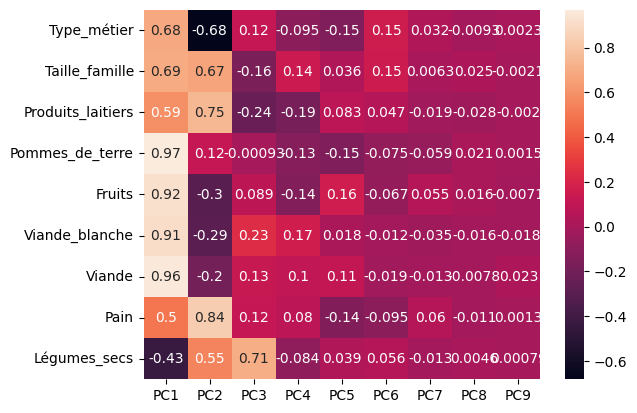

In [14]:
# 6
principal_components = pca.fit_transform(scaled_data)

# calculate the correlations between the variables and the principal components
correlations = np.corrcoef(scaled_data.T, principal_components.T)[-principal_components.shape[1]:, :-principal_components.shape[1]]

# create a table with the correlations between the variables and the principal components
correlation_table = pd.DataFrame(data=correlations, columns=df.columns, index=[f'PC{i+1}' for i in range(principal_components.shape[1])])

sns.heatmap(correlation_table.T,annot=True)

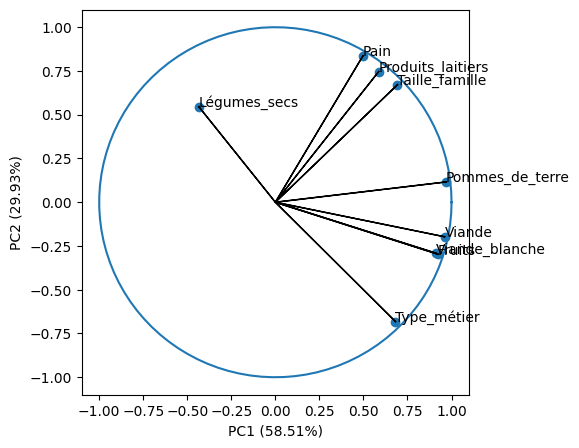

In [15]:
# 7
# calculate the correlations between the variables and the first two principal components
correlations = np.corrcoef(df.T, principal_components_2.T)[-2:, :-2]

# create a scatter plot of the correlations between the variables and the first two principal components
plt.figure(figsize=(5,5))
plt.scatter(correlations[0], correlations[1])

# label the points
for i, col in enumerate(df.columns):
    plt.annotate(col, (correlations[0, i], correlations[1, i]))
    plt.arrow(0,0,correlations[0, i],correlations[1, i])

# draw a unit circle
theta = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(theta), np.sin(theta))

# label the axes
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%})')

# show the plot
plt.show()

8) Interprétation:
- Plus un point est proche du bord du cercle, plus sa corrélation avec les composantes principales est forte: les variables 'Pain', 'Produits_laitiers', 'Taille_famille', 'Pommes_de_terre', 'Viande', 'Viande_blanche', 'Fruit' et 'Type_métier' sont donc fortement corrélées avec les 2 premieres composantes principales.
- L’angle entre deux points représente la corrélation entre les variables correspondantes : l’angle est proche de 180 degrés, ce qui implique que les variables sont fortement corrélées.

In [16]:
principal_components_2

array([[ 0.24570081,  3.370946  ],
       [ 2.2532244 ,  1.57168265],
       [ 4.85655976, -0.00957222],
       [-1.11334965,  1.87536773],
       [-0.10657317,  0.699773  ],
       [ 2.01569979, -1.79026361],
       [-2.43247104,  0.6069496 ],
       [-1.72301377, -0.29560201],
       [ 1.83032065, -1.90417941],
       [-3.47816531, -0.37360103],
       [-2.19023706, -1.97256502],
       [-0.15769541, -1.77893569]])

In [83]:
# 9
# calculer les carrés des cosinus pour chaque individu
cos2 = principal_components_2 ** 2
for i in range(principal_components_2.shape[1]):
    cos2[:, i] = cos2[:, i] / np.sum(principal_components_2 ** 2, axis=1)

# créer un tableau avec les carrés des cosinus pour chaque individu
cos2_table = pd.DataFrame(data=cos2, columns=[f'PC{i+1}' for i in range(principal_components_2.shape[1])])
cos2_table

,PC1,PC2
0,0.005285,0.994715
1,0.672702,0.327298
2,0.999996,0.000004
3,0.260598,0.739402
4,0.022669,0.977331
5,0.559025,0.440975
6,0.941389,0.058611
7,0.971408,0.028592
8,0.480230,0.519770
9,0.988594,0.011406


In [84]:
# 10
# calculer les contributions de chaque individu à l'inertie de chaque axe principal
contributions = np.zeros(principal_components_2.shape)
for i in range(principal_components_2.shape[1]):
    contributions[:, i] = (principal_components_2[:, i] ** 2) / pca_2.explained_variance_[i]

# créer un tableau avec les contributions de chaque individu à chaque axe principal
contributions_table = pd.DataFrame(data=contributions, columns=[f'PC{i+1}' for i in range(principal_components_2.shape[1])])
contributions_table

,PC1,PC2
0,0.010508,3.867194
1,0.883758,0.840663
2,4.105648,0.000031
3,0.215768,1.196920
4,0.001977,0.166651
5,0.707255,1.090753
6,1.029958,0.125371
7,0.516775,0.029738
8,0.583148,1.233980
9,2.105837,0.047502


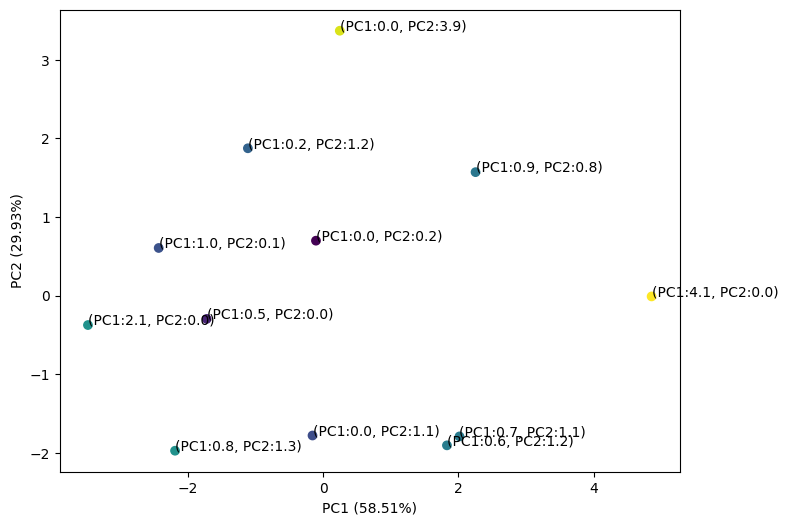

In [85]:
# 11
plt.figure(figsize=(8,6))
plt.scatter(principal_components_2[:,0],principal_components_2[:,1],c=contributions_table['PC1']+contributions_table['PC2'])
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%})')

for i, type_metier in enumerate(df['Type_métier']):
    plt.annotate(f"(PC1:{round(contributions_table['PC1'][i],1)}, PC2:{round(contributions_table['PC2'][i],1)})",
                 (principal_components_2[:,0][i],principal_components_2[:,1][i]))
plt.show()


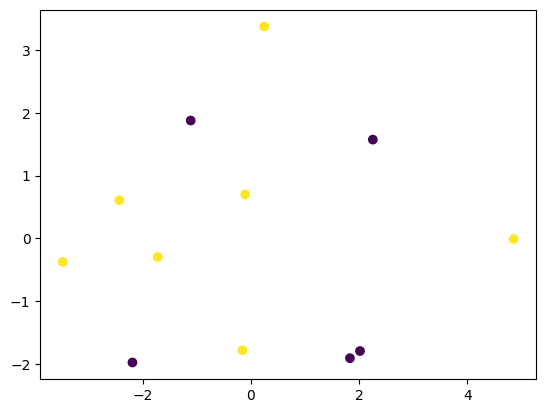

In [86]:
# 12
mask = np.any(cos2 >= 0.8, axis=1)

# créez un nuage de points des deux premières composantes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=mask)

# affichez le nuage de points
plt.show()

ces individus ont des valeurs pour les variables qui ne suivent pas les tendances générales observées dans les données.